# Project description
Input: Keywords,

APIs: Pytrends, FB Prophet

Output: Table on Google Sheets containing: Google Trend data for each keyword extracted through Pytrends API (last 5Y), forecasted 90D with Prophet and visualised with png/graph plus custom values and rules extracted out of given pytrends/prophet data, also displayed in Table. (Example Prophet RSME, plot.components, Trend Graph, yearly trend,..)

SQL might be necessary, or google drive connection should be established.

Eventual dashboard needed after completion of finished dataframe.

In [6]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

In [7]:
pytrends = TrendReq()

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Choose Keyword, Region, Platform

In [9]:
keywords = ['Laufrad']

# GETS DATA FOR  the given keywords
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 5-y',
     geo='DE',
     gprop='')

data = pytrend.interest_over_time()
data

,Laufrad,isPartial
date,,
2017-06-11,43,False
2017-06-18,45,False
2017-06-25,47,False
2017-07-02,47,False
2017-07-09,49,False
...,...,...
2022-05-01,47,False
2022-05-08,49,False
2022-05-15,48,False


In [10]:
data= data.drop(labels=['isPartial'],axis='columns')

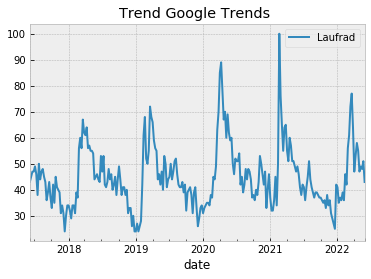

In [11]:
image = data.plot(title = 'Trend Google Trends ')

In [14]:
from fbprophet import Prophet

In [28]:
df = data.reset_index().rename(columns={"date":'ds','Laufrad':'y'})
df

,ds,y
0,2017-06-11,43
1,2017-06-18,45
2,2017-06-25,47
3,2017-07-02,47
4,2017-07-09,49
...,...,...
255,2022-05-01,47
256,2022-05-08,49
257,2022-05-15,48
258,2022-05-22,51


In [23]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.87555
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


      78       562.658   0.000676664       89.7621   6.966e-06       0.001      139  LS failed, Hessian reset 
      99       562.704    1.3369e-05       72.7812      0.3092      0.9114      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       562.716   1.51563e-05       90.5342   1.925e-07       0.001      326  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       562.716    1.9594e-08       80.9799      0.2523      0.7819      364   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [24]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
345,2022-08-23
346,2022-08-24
347,2022-08-25
348,2022-08-26
349,2022-08-27


In [25]:
df['ds'] = pd.to_datetime(df['ds'])

In [26]:
forecast = m.predict(future)

# Keyword trend Forecasted 2Y without holiday data

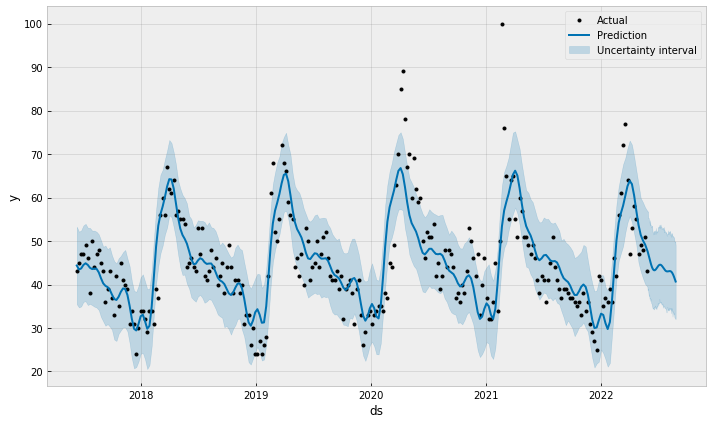

In [27]:
fig = m.plot(forecast)
plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
plt.show()

In [29]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-06-11,43.116165,35.485524,53.314219,43.116165,43.116165,1.261713,1.261713,1.261713,1.261713,1.261713,1.261713,0.0,0.0,0.0,44.377878
1,2017-06-18,43.138709,34.734159,52.149447,43.138709,43.138709,0.320987,0.320987,0.320987,0.320987,0.320987,0.320987,0.0,0.0,0.0,43.459696
2,2017-06-25,43.161253,34.973044,52.450272,43.161253,43.161253,0.542019,0.542019,0.542019,0.542019,0.542019,0.542019,0.0,0.0,0.0,43.703271
3,2017-07-02,43.183796,36.016486,53.582169,43.183796,43.183796,1.312709,1.312709,1.312709,1.312709,1.312709,1.312709,0.0,0.0,0.0,44.496506
4,2017-07-09,43.206340,36.167508,53.960497,43.206340,43.206340,1.684940,1.684940,1.684940,1.684940,1.684940,1.684940,0.0,0.0,0.0,44.891280


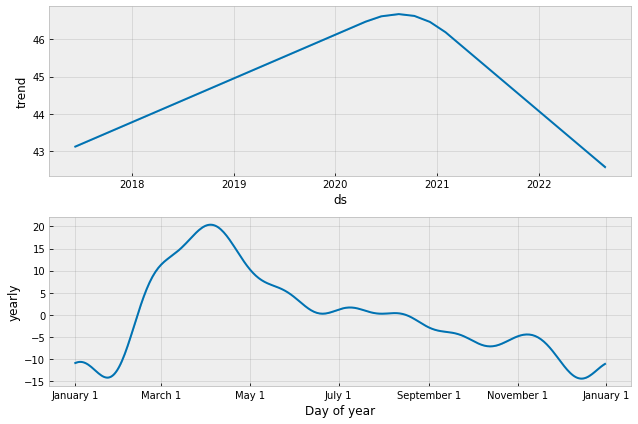

In [30]:
fig = m.plot_components(forecast)

In [31]:
from statsmodels.tools.eval_measures import rmse

ModuleNotFoundError: No module named 'statsmodels'

In [30]:
test = df[df['ds'] >= pd.Timestamp('2020-01-01')]

In [31]:
predictions = forecast.iloc[-len(test):]['yhat']

In [32]:
train = df[df['ds'] < pd.Timestamp('2020-01-01')]

In [33]:
predictions = forecast.iloc[-len(test):]['yhat']
actuals = test['y']

print(f"RMSE: {round(rmse(predictions, actuals))}")

RMSE: 16


In [34]:
import numpy as np

In [35]:
import pandas as pd

In [36]:
import matplotlib.pyplot as plt

In [37]:
model = Prophet(interval_width=0.95)

## Choose holiday country

In [38]:
model.add_country_holidays(country_name='DE')

In [39]:
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.74013
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       305.387   6.47375e-06       88.9222      0.4983      0.4983      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       305.388   4.06755e-09       90.2726      0.2098      0.2098      163   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [40]:
weekly_seasonality = True 

In [41]:
#inkludierte Feriendaten als autocorrelation

In [42]:
model.train_holiday_names.to_list()

['Neujahr',
 'Karfreitag',
 'Ostermontag',
 'Erster Mai',
 'Christi Himmelfahrt',
 'Pfingstmontag',
 'Tag der Deutschen Einheit',
 'Reformationstag',
 'Erster Weihnachtstag',
 'Zweiter Weihnachtstag']

In [43]:
model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True)
model.add_country_holidays(country_name= 'DE')
model.fit(train)

Initial log joint probability = -3.74013


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       305.504   2.82918e-06       93.1876       0.223           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       305.504   4.44655e-07       102.731   4.629e-09       0.001      230  LS failed, Hessian reset 
     148       305.504      5.63e-08       100.086   6.323e-10       0.001      286  LS failed, Hessian reset 
     153       305.504   7.93174e-09       89.3695      0.7455      0.7455      292   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [44]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

In [45]:
# Keyword trend with holidays taken into account (DE)

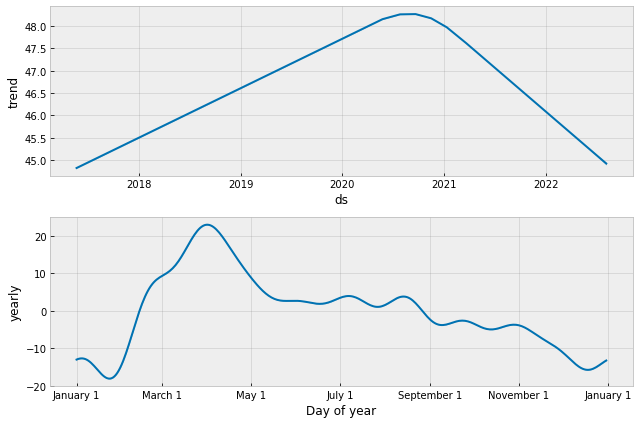

In [46]:
model.plot_components(forecast);

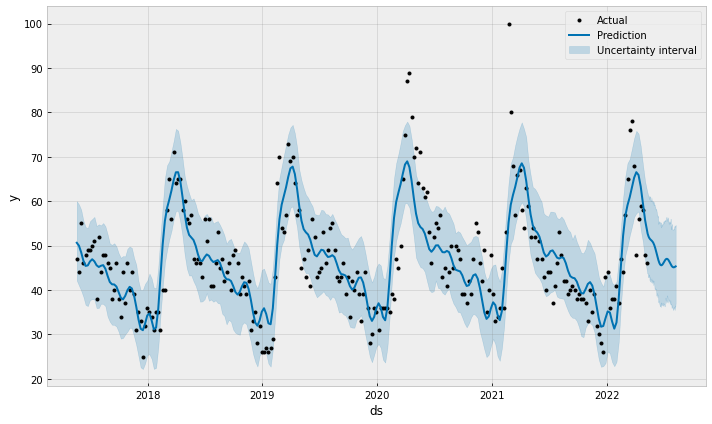

In [47]:
fig = m.plot(forecast)
plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
plt.show()

In [48]:
#speichern aller Daten als .csv (prüfen 2 letzte)

In [49]:
forecast.to_csv('Forecast_plus_holiday.csv')

In [50]:
dataframe = pd.read_csv('Forecast_plus_holiday.csv')

In [51]:
forecast["trend"].to_csv('Overall_Trend.csv')

In [52]:
forecast["yearly"].to_csv('Yearly_trend.csv')

In [53]:
#RMSE deviation test mit holidays

In [54]:
test = df[df['ds'] >= pd.Timestamp('2020-01-01')]

In [55]:
predictions = forecast.iloc[-len(test):]['yhat']

In [56]:
train = df[df['ds'] < pd.Timestamp('2020-01-01')]

In [57]:
predictions = forecast.iloc[-len(test):]['yhat']
actuals = test['y']

print(f"RMSE: {round(rmse(predictions, actuals))}")

RMSE: 16


In [58]:
# herausfinden höhepunkt minus einen monat und markieren in graph /datum nennen dann Satz verfassen wie smart recommendations.

In [59]:
## Output: Wann start advertising, wann high, wann low

In [60]:
maxValues = df[[ 'y', 'ds']].max()
 
print("Maximum value in column Time(ds) & Trend(y): ")
print(maxValues)

Maximum value in column Time(ds) & Trend(y): 
y                     100
ds    2022-05-08 00:00:00
dtype: object


In [61]:
## finden von weg, highest axis in forecast plot yearly als datum und dann xy axe anzeigen zu lassen bei nächstem eintreffenden ereignis

In [62]:
 df.loc[df['y'].idxmax()]

ds    2021-02-21 00:00:00
y                     100
Name: 196, dtype: object

In [63]:
highest_value_dates = dataframe.nlargest(1,['yhat_upper'])

In [64]:
highest_value_dates.head()

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
150,150,2020-04-05,48.005665,59.498303,77.944105,48.005665,48.005665,20.983417,20.983417,20.983417,20.983417,20.983417,20.983417,0.0,0.0,0.0,68.989082


In [65]:
highest_value_dates.to_csv('highest_vd.csv')

In [66]:
df3 = highest_value_dates 

In [67]:
most_recent_date = df3['ds'].max()

In [68]:
print (most_recent_date)

2020-04-05


In [69]:
from datetime import date

today = date.today


In [70]:
df3["datetime"] = pd.to_datetime(df3.ds)

In [71]:
if most_recent_date <= ('today'):
    print ("Der Höhepunkt liegt in der Vergangenheit.")
else: 
    print ('Der Höhepunkt wird erwartet am', (most_recent_date),'.' )

Der Höhepunkt liegt in der Vergangenheit.
